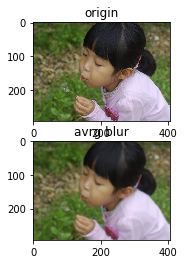

In [2]:
import cv2
import numpy as np

img = cv2.imread('./img/girl.jpg')
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('avrg blur', blured) 
# cv2.waitKey()
# cv2.destroyAllWindows()

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'avrg blur':blured}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

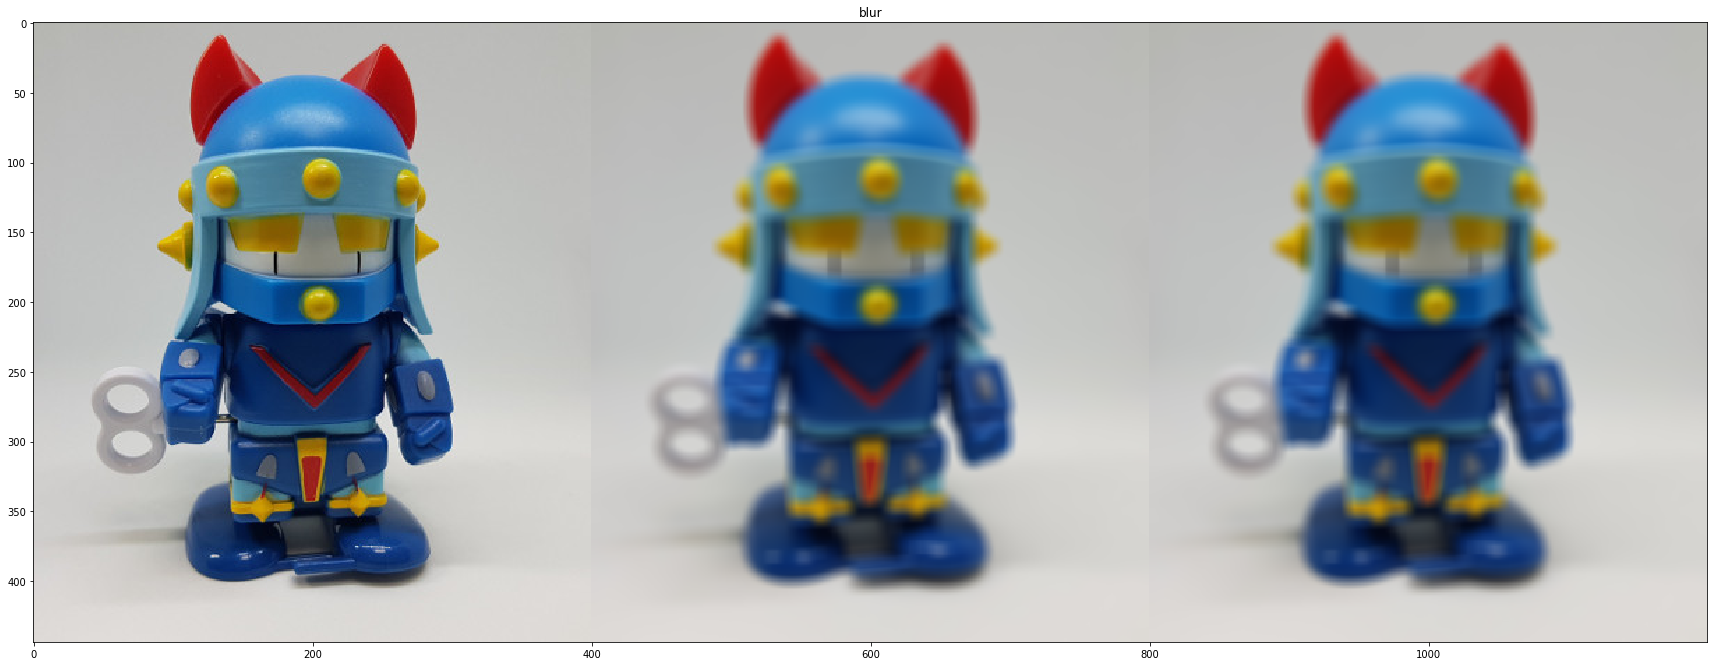

In [6]:
import cv2
import numpy as np

file_name = './img/taekwonv1.jpg'
img = cv2.imread(file_name)

# blur() 함수로 블러링  ---①
blur1 = cv2.blur(img, (10,10))
# boxFilter() 함수로 블러링 적용 ---②
blur2 = cv2.boxFilter(img, -1, (10,10))

# 결과 출력
merged = np.hstack( (img, blur1, blur2))
# cv2.imshow('blur', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.title('blur')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

k1: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
k2: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


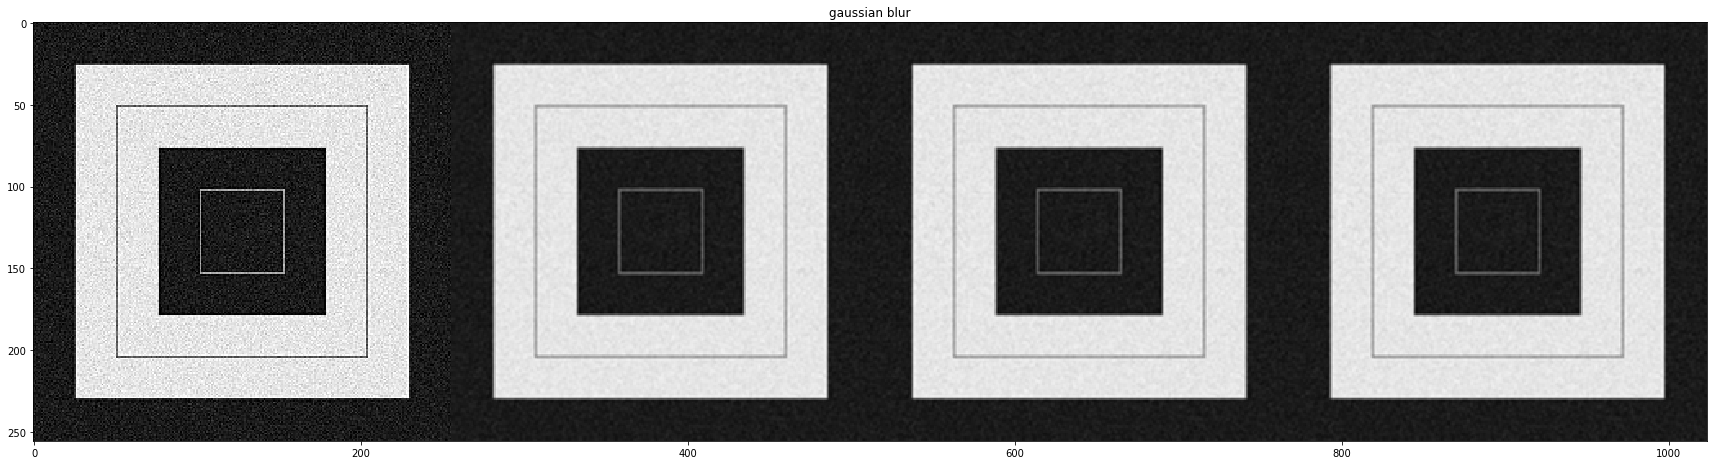

In [8]:
import cv2
import numpy as np

img = cv2.imread('./img/gaussian_noise.jpg')

# 가우시안 커널을 직접 생성해서 블러링  ---①
k1 = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) *(1/16)
blur1 = cv2.filter2D(img, -1, k1)

# 가우시안 커널을 API로 얻어서 블러링 ---②
k2 = cv2.getGaussianKernel(3, 0)
blur2 = cv2.filter2D(img, -1, k2*k2.T)

# 가우시안 블러 API로 블러링 ---③
blur3 = cv2.GaussianBlur(img, (3, 3), 0)

# 결과 출력
print('k1:', k1)
print('k2:', k2*k2.T)
merged = np.hstack((img, blur1, blur2, blur3))
# cv2.imshow('gaussian blur', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('gaussian blur')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

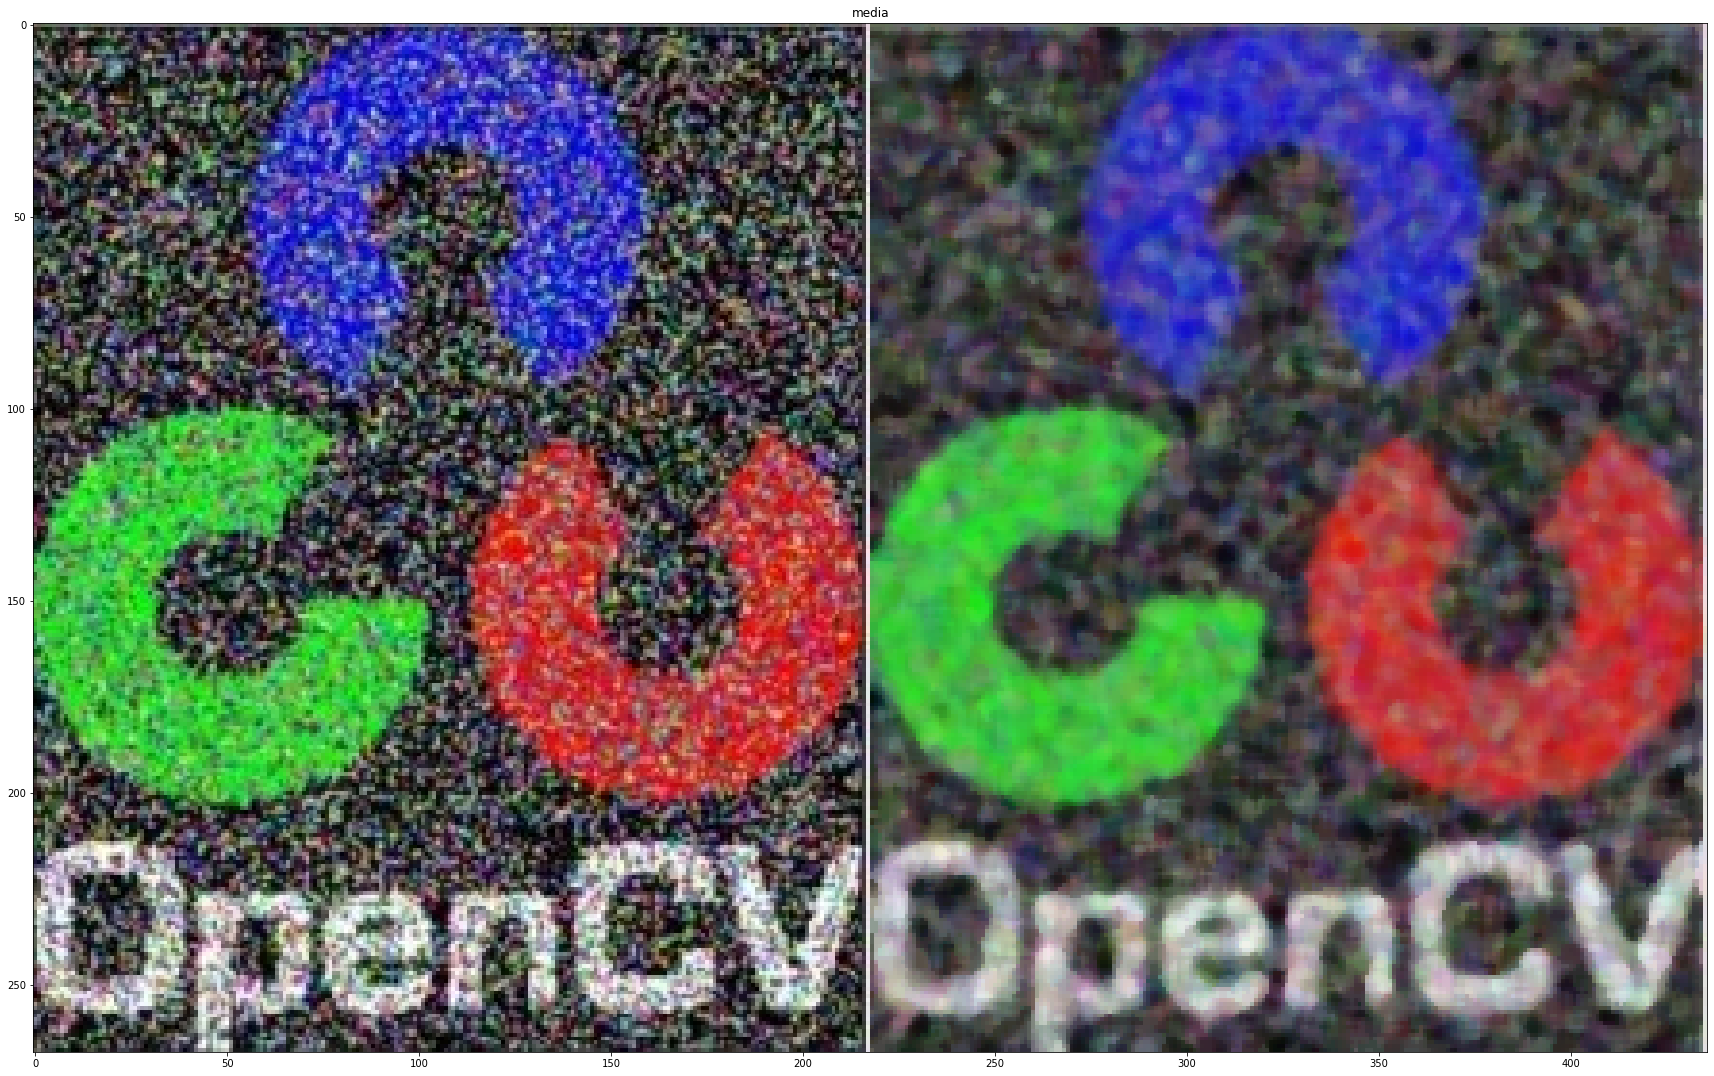

In [9]:
import cv2
import numpy as np

img = cv2.imread("./img/salt_pepper_noise.jpg")

# 미디언 블러 적용 --- ①
blur = cv2.medianBlur(img, 5)

# 결과 출력 
merged = np.hstack((img,blur))
# cv2.imshow('media', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.title('media')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

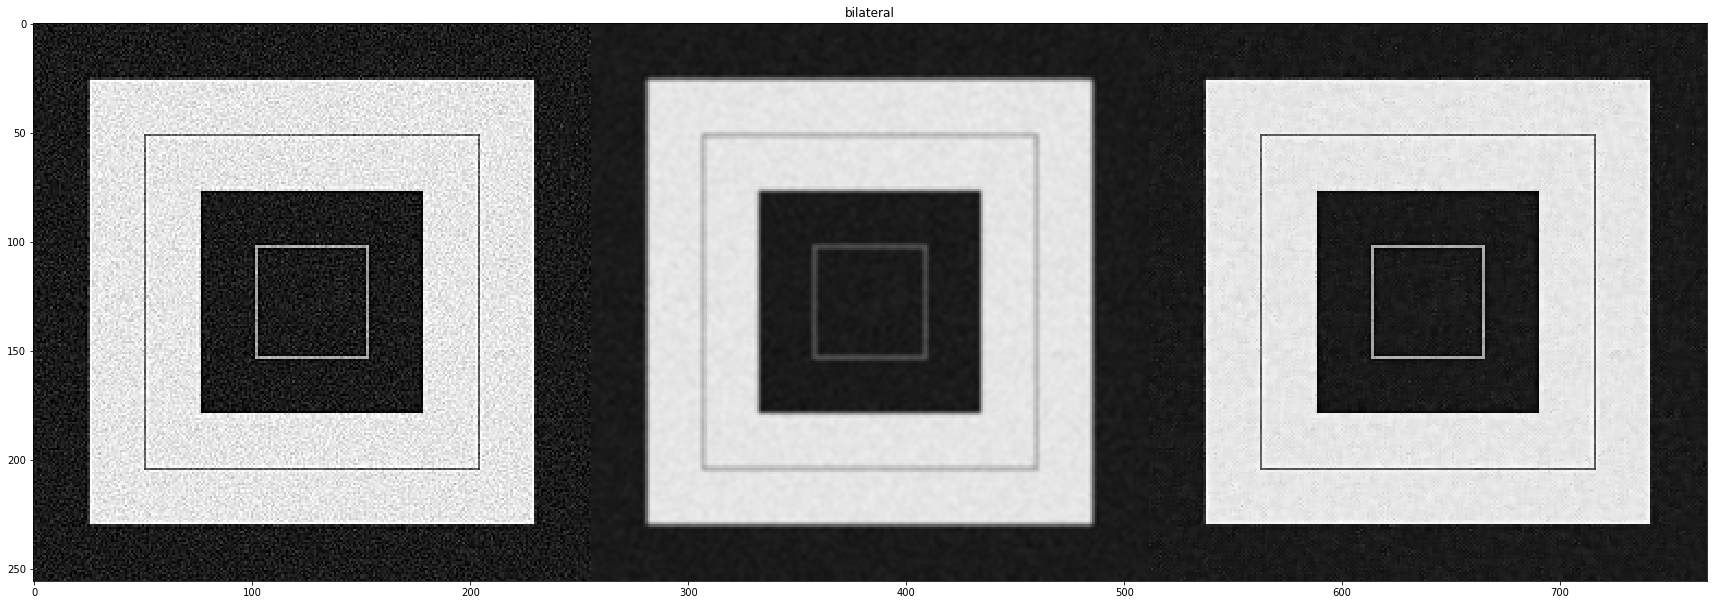

In [11]:
import cv2
import numpy as np

img = cv2.imread("./img/gaussian_noise.jpg")

# 가우시안 필터 적용 ---①
blur1 = cv2.GaussianBlur(img, (5,5), 0)

# 바이레터럴 필터 적용 ---②
blur2 = cv2.bilateralFilter(img, 5, 75, 75)

# 결과 출력
merged = np.hstack((img, blur1, blur2))
# cv2.imshow('bilateral', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('bilateral')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

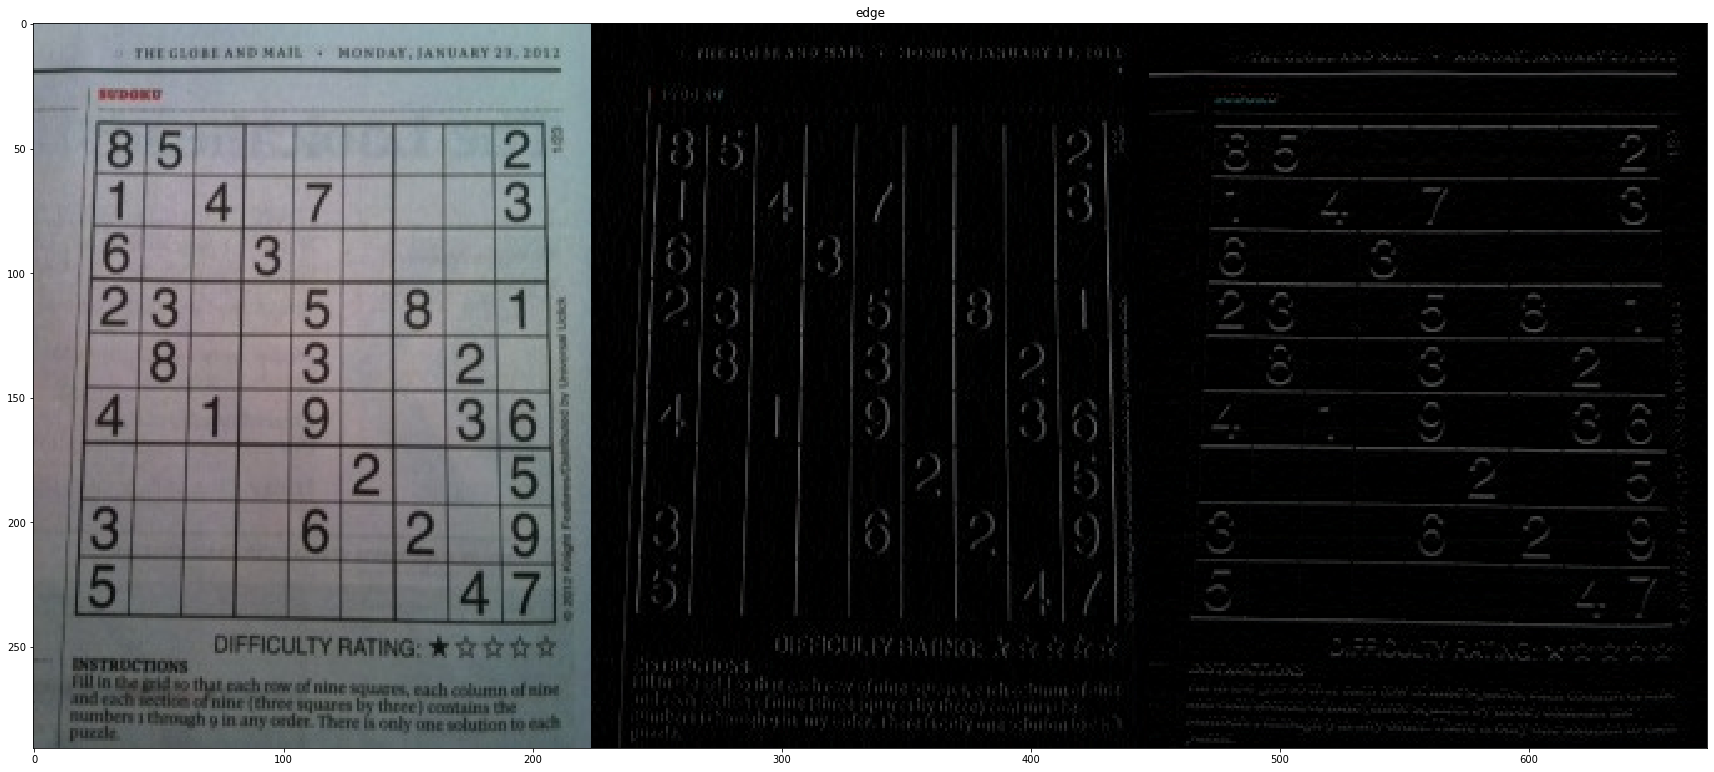

In [12]:
import cv2
import numpy as np

img = cv2.imread("./img/sudoku.jpg")

#미분 커널 생성 ---①
gx_kernel = np.array([[ -1, 1]])
gy_kernel = np.array([[ -1],[ 1]])

# 필터 적용 ---②
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
# 결과 출력
merged = np.hstack((img, edge_gx, edge_gy))
# cv2.imshow('edge', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('edge')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

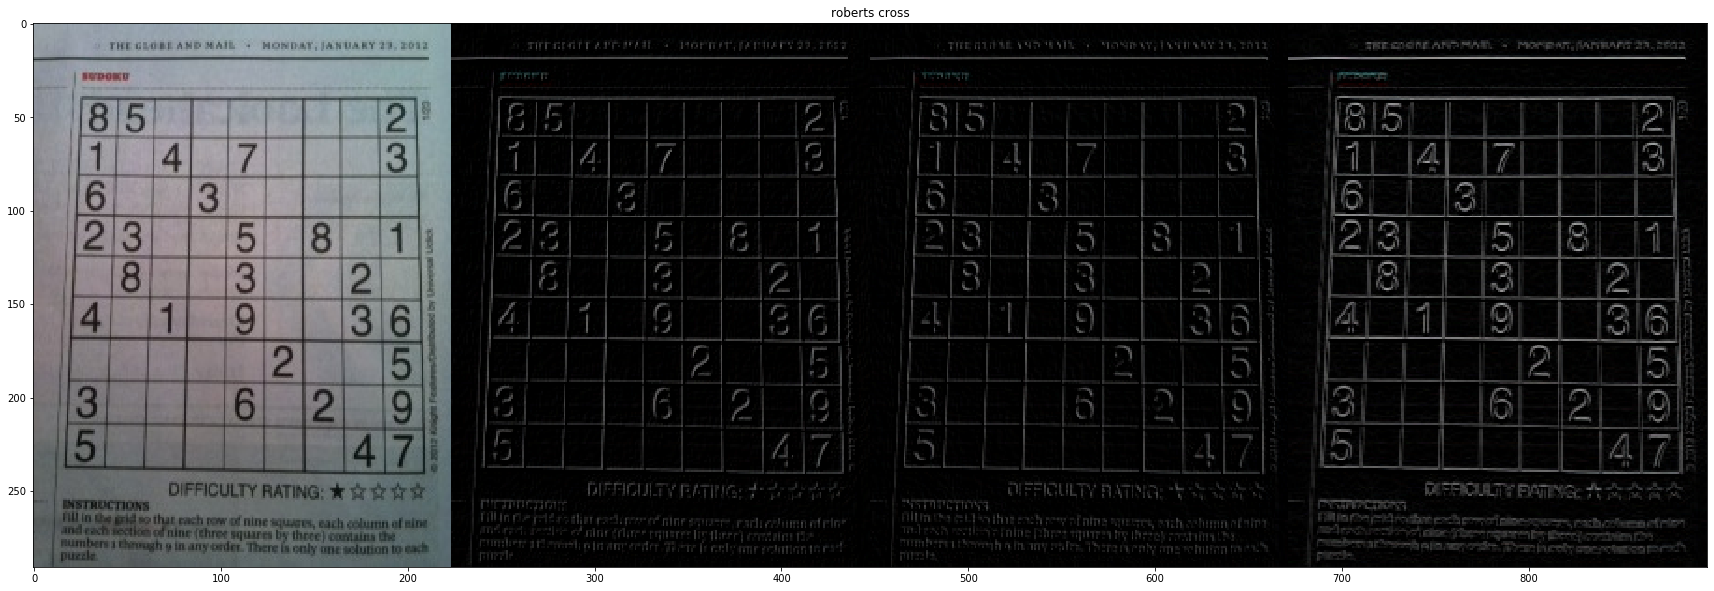

In [14]:
import cv2
import numpy as np

img = cv2.imread("./img/sudoku.jpg")

# 로버츠 커널 생성 ---①
gx_kernel = np.array([[1,0], [0,-1]])
gy_kernel = np.array([[0, 1],[-1,0]])

# 커널 적용 ---② 
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

# 결과 출력
merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
# cv2.imshow('roberts cross', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('roberts cross')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

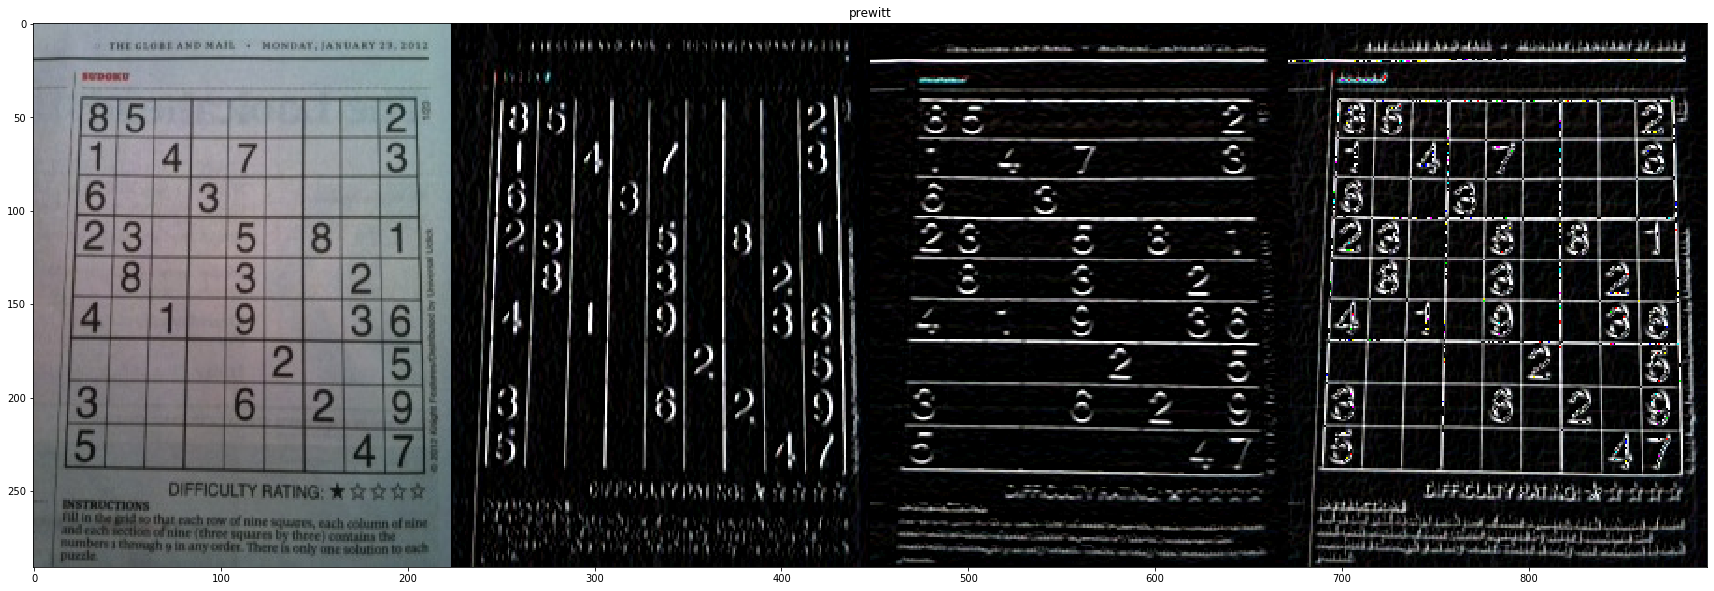

In [16]:
import cv2
import numpy as np

file_name = "./img/sudoku.jpg"
img = cv2.imread(file_name)

# 프리윗 커널 생성
gx_k = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
gy_k = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])

# 프리윗 커널 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 결과 출력
merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
# cv2.imshow('prewitt', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('prewitt')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

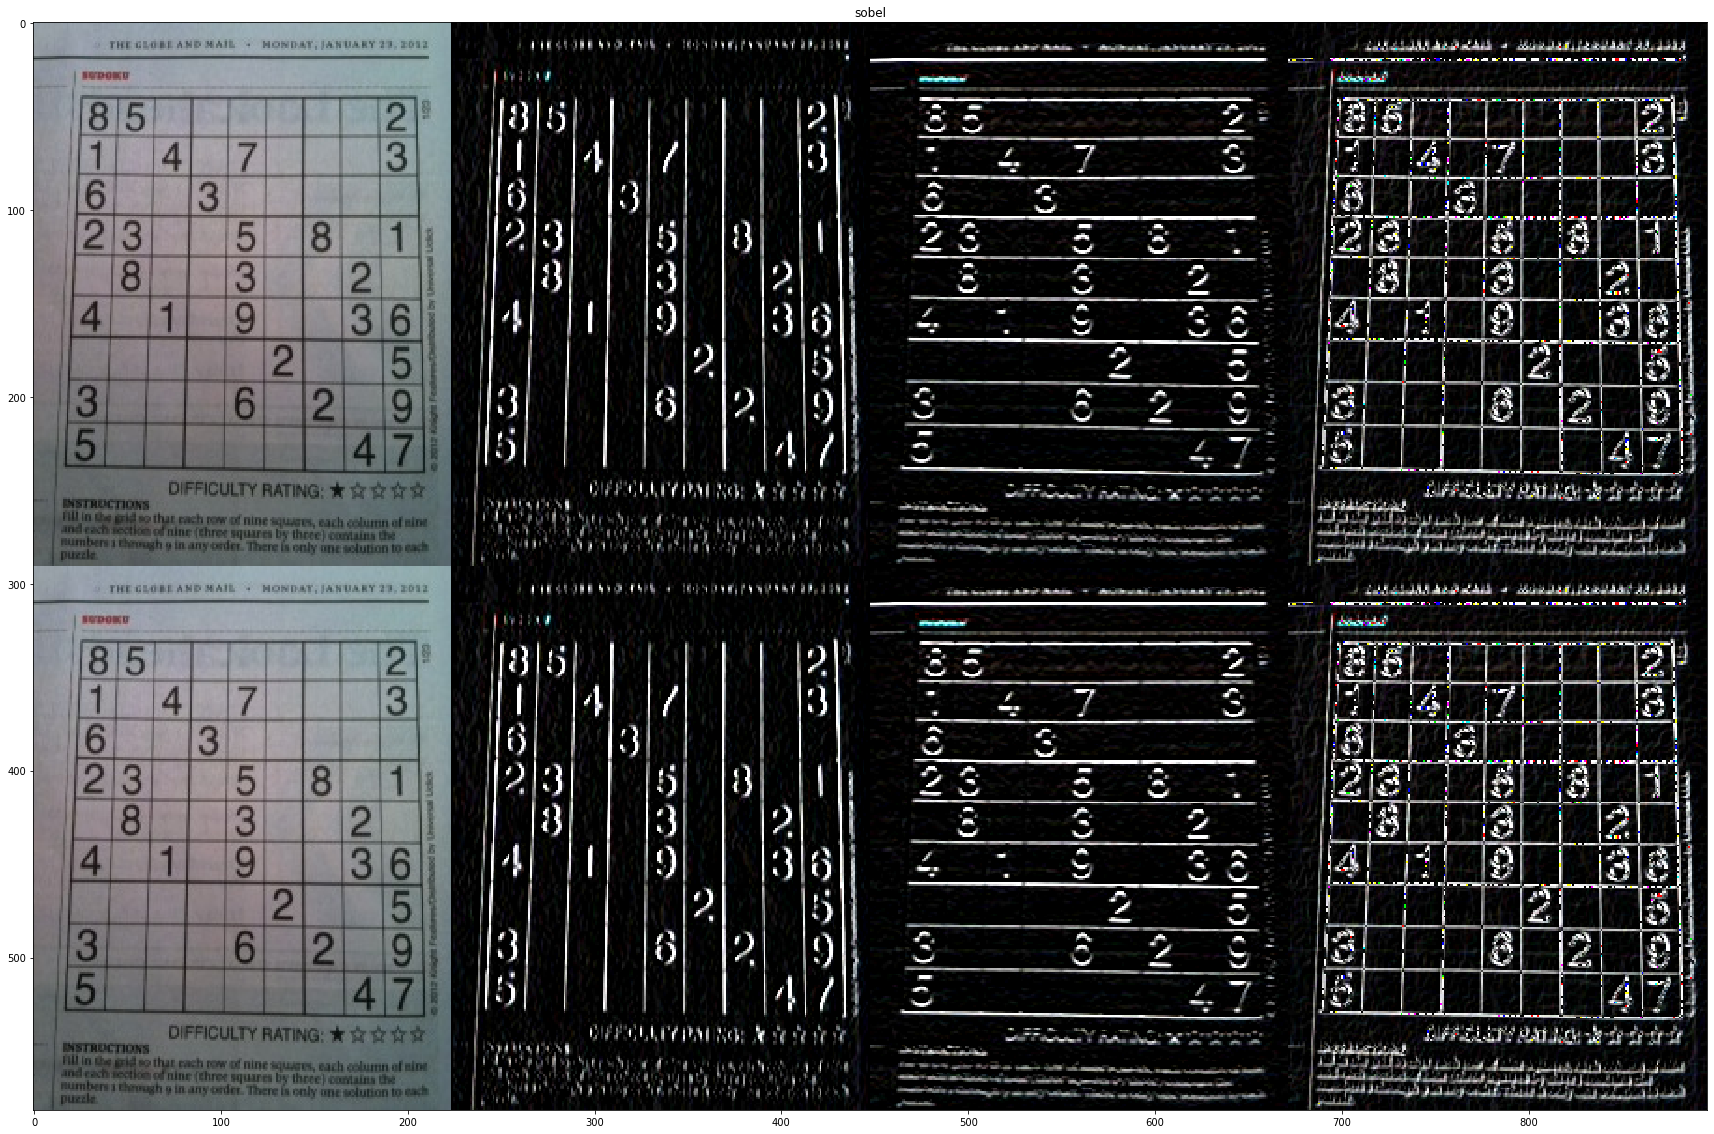

In [17]:
import cv2
import numpy as np

img = cv2.imread("./img/sudoku.jpg")

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 소벨 API를 생성해서 엣지 검출
sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3) 

# 결과 출력
merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
# cv2.imshow('sobel', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('sobel')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 


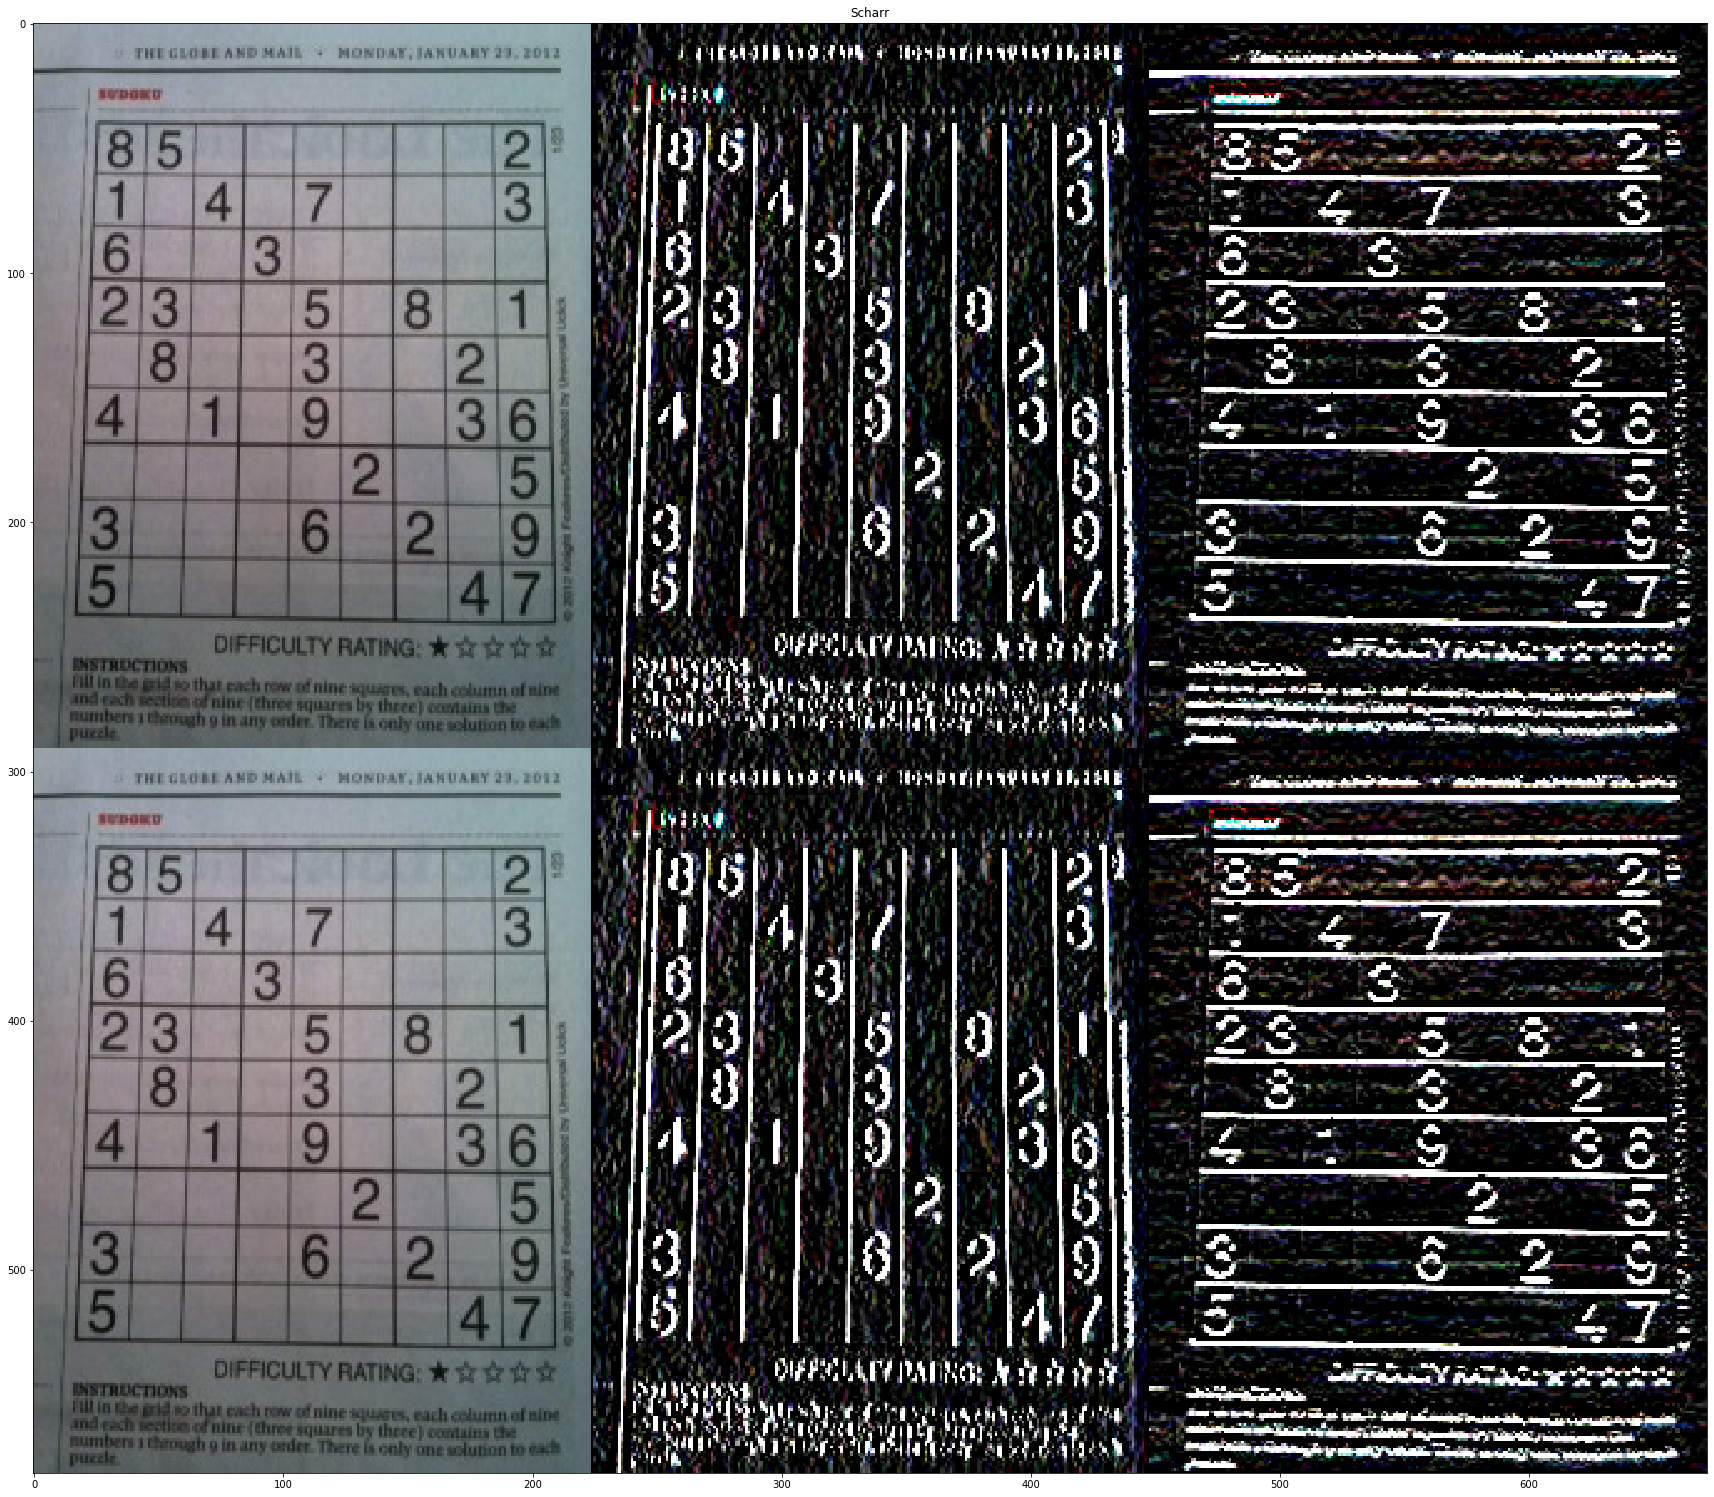

In [18]:
import cv2
import numpy as np

img = cv2.imread("./img/sudoku.jpg")

# 샤르 커널을 직접 생성해서 엣지 검출 ---①
gx_k = np.array([[-3,0,3], [-10,0,10],[-3,0,3]])
gy_k = np.array([[-3,-10,-3],[0,0,0], [3,10,3]])
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 샤르 API로 엣지 검출 ---②
scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)

# 결과 출력
merged1 = np.hstack((img, edge_gx, edge_gy))
merged2 = np.hstack((img, scharrx, scharry))
merged = np.vstack((merged1, merged2))
# cv2.imshow('Scharr', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('Scharr')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

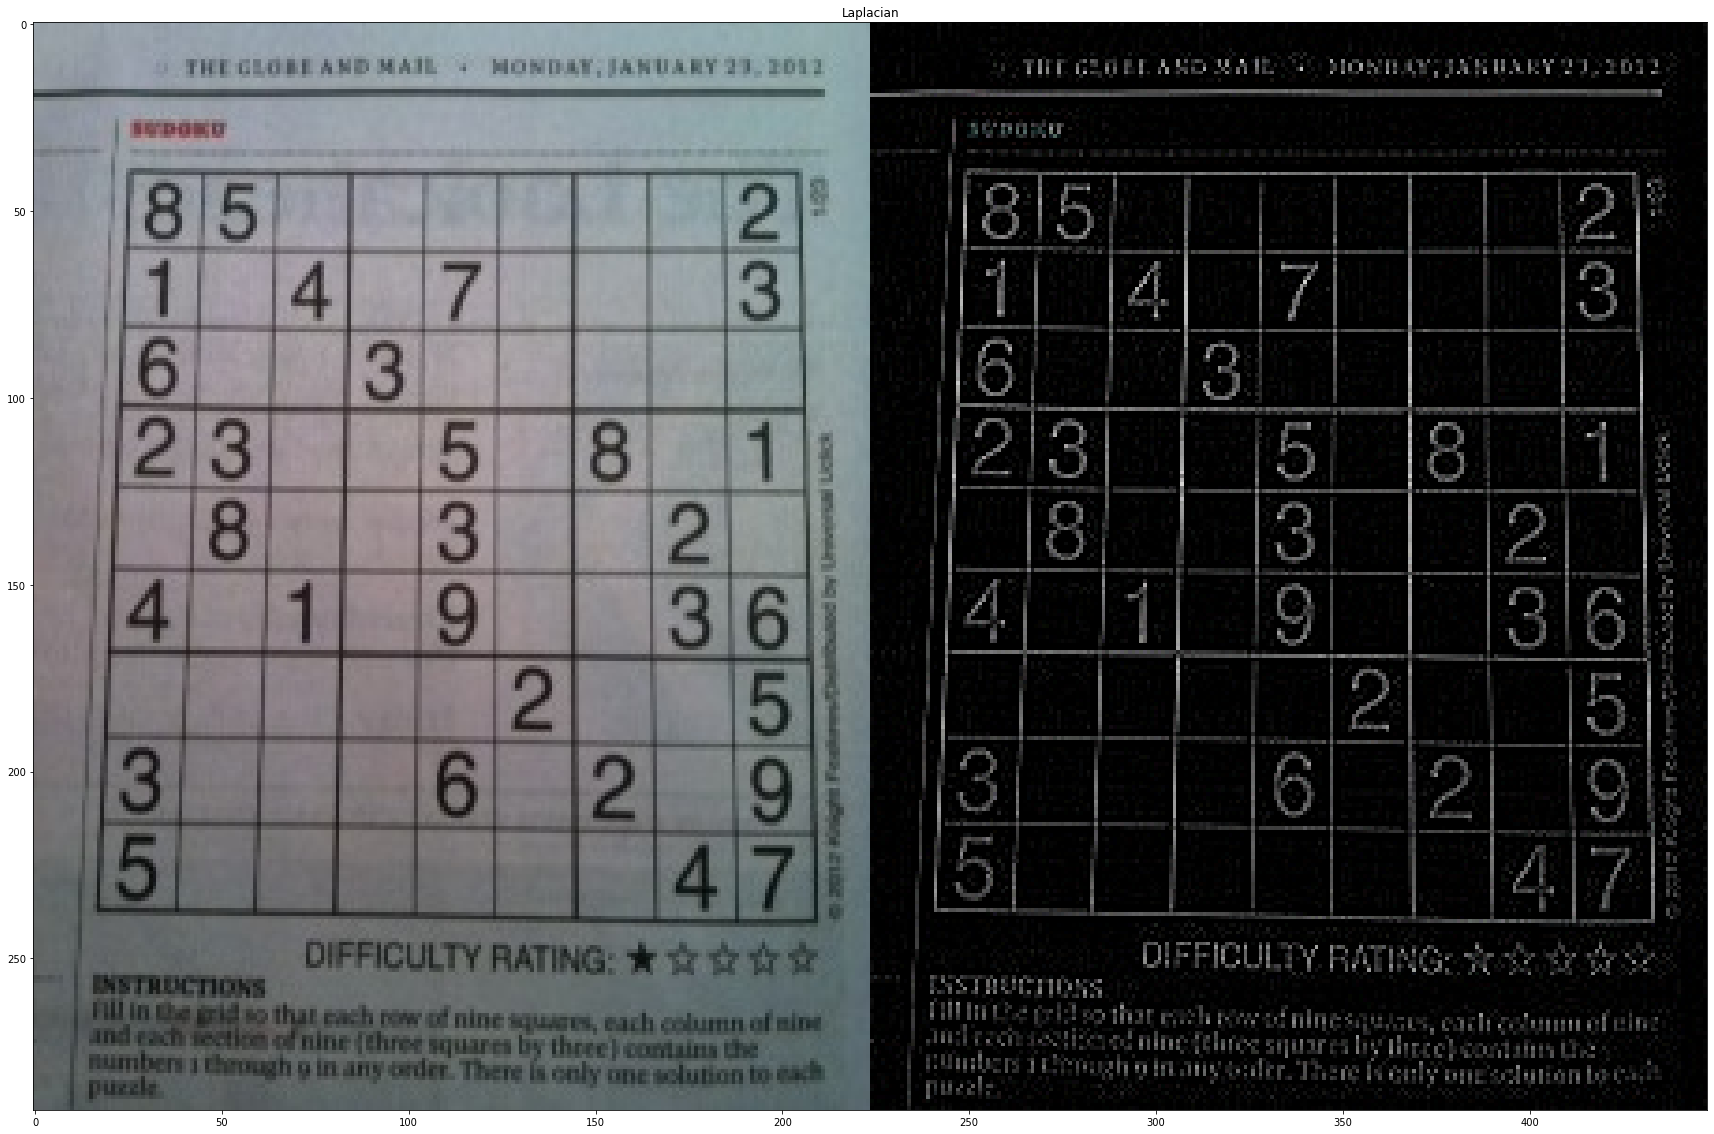

In [19]:
import cv2
import numpy as np

img = cv2.imread("./img/sudoku.jpg")

# 라플라시안 필터 적용 ---①
edge = cv2.Laplacian(img, -1)

# 결과 출력
merged = np.hstack((img, edge))
# cv2.imshow('Laplacian', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('Laplacian')
plt.imshow(cv2tomat(merged))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

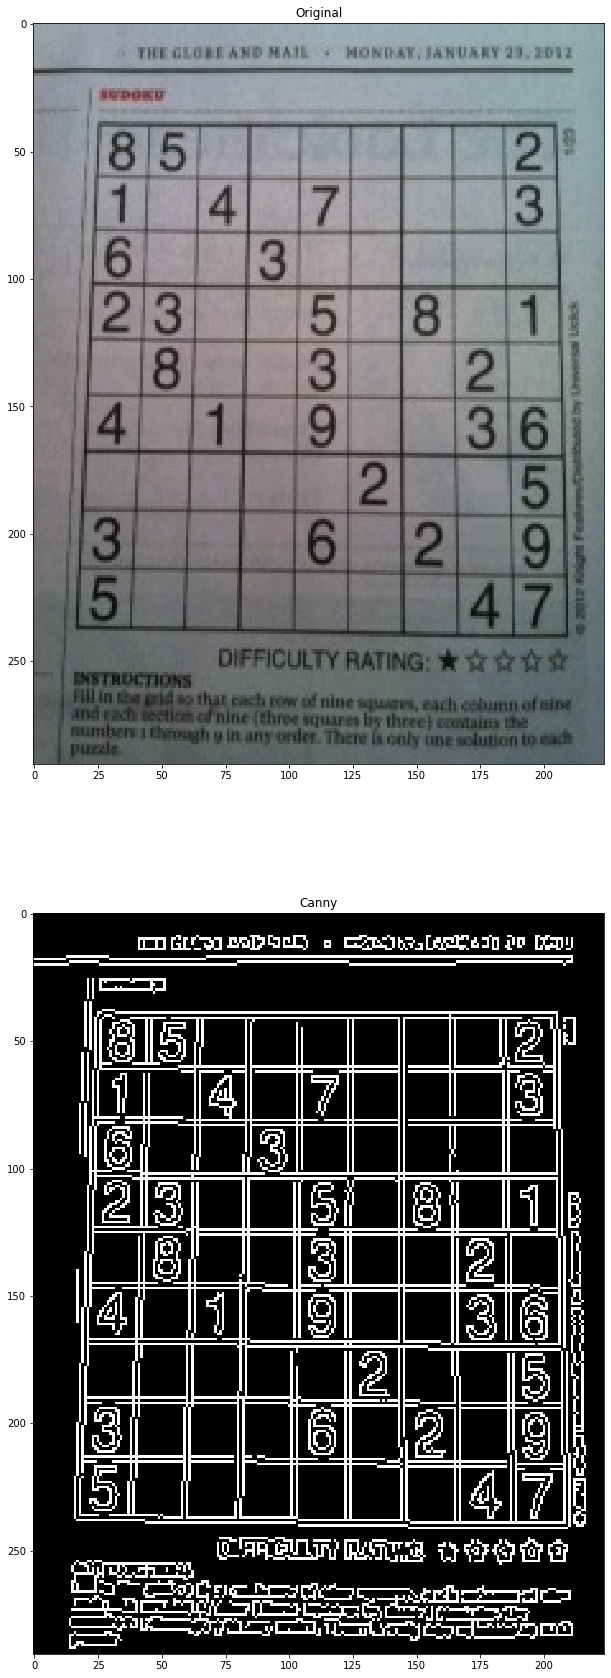

In [4]:
import cv2, time
import numpy as np

img = cv2.imread("./img/sudoku.jpg")

# 케니 엣지 적용 
edges = cv2.Canny(img,100,200)

# 결과 출력
# cv2.imshow('Original', img)
# cv2.imshow('Canny', edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'Original':img,'Canny':edges}
plt.subplot(2,1,1)
plt.title('Original')
plt.imshow(cv2tomat(img))
plt.subplot(2,1,2)
plt.title('Canny')
plt.imshow(edges,cmap='gray')
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

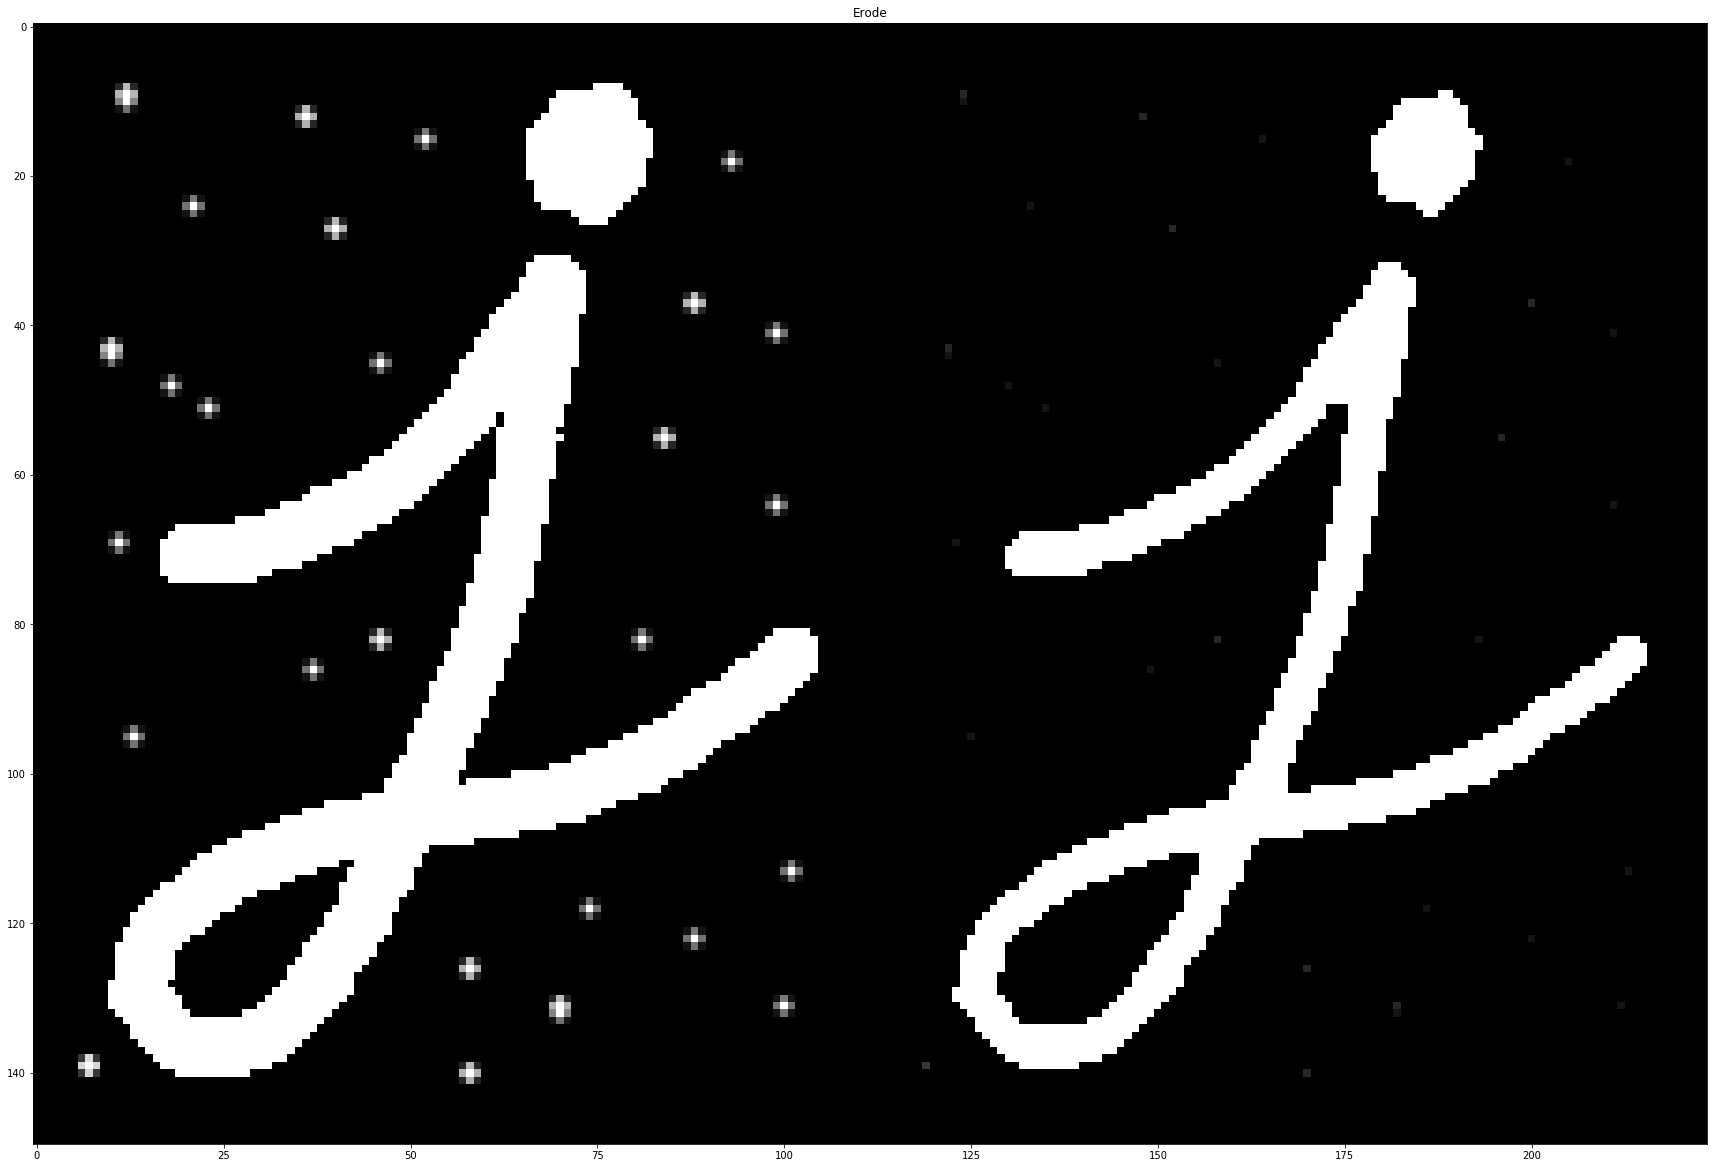

In [5]:
import cv2
import numpy as np

img = cv2.imread('./img/morph_dot.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 침식 연산 적용 ---②
erosion = cv2.erode(img, k)

# 결과 출력
merged = np.hstack((img, erosion))
# cv2.imshow('Erode', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('Erode')
plt.imshow(cv2tomat(merged))
plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

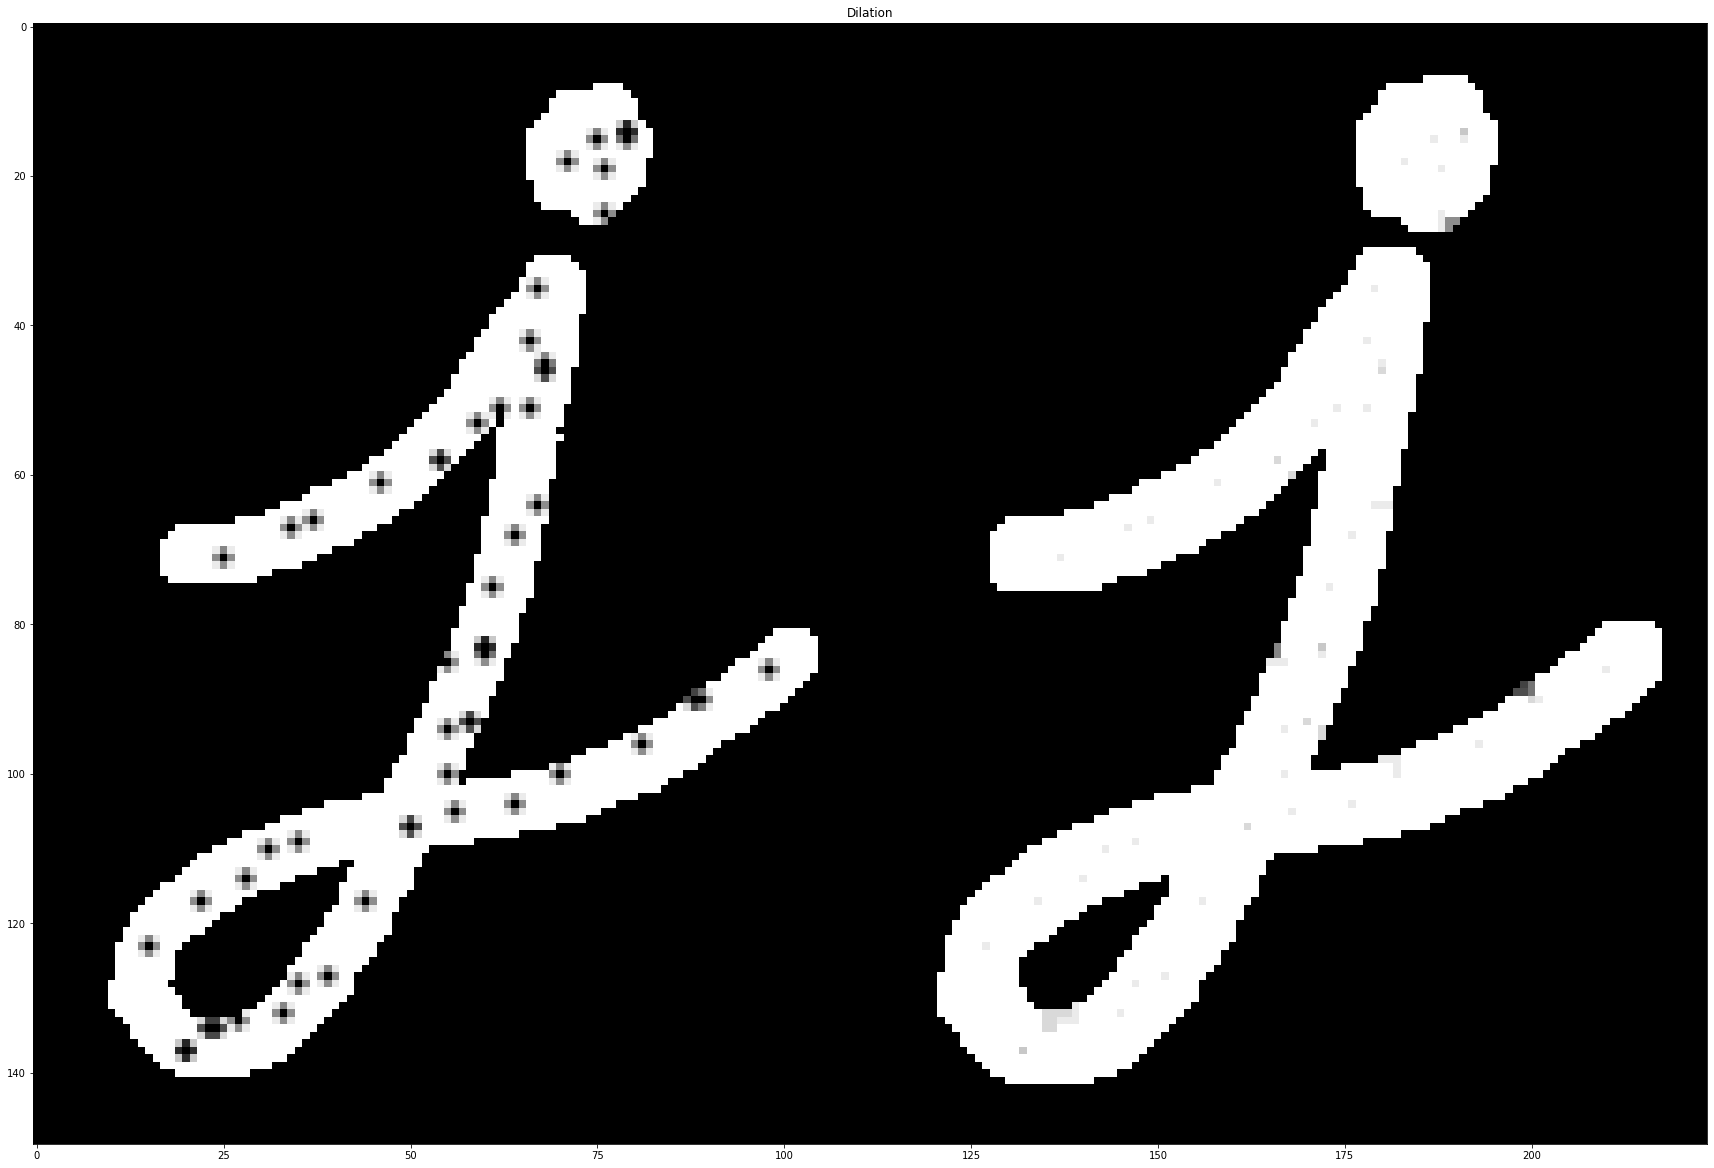

In [6]:
import cv2
import numpy as np

img = cv2.imread('./img/morph_hole.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 팽창 연산 적용 ---②
dst = cv2.dilate(img, k)

# 결과 출력
merged = np.hstack((img, dst))
# cv2.imshow('Dilation', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('Dilation')
plt.imshow(cv2tomat(merged))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

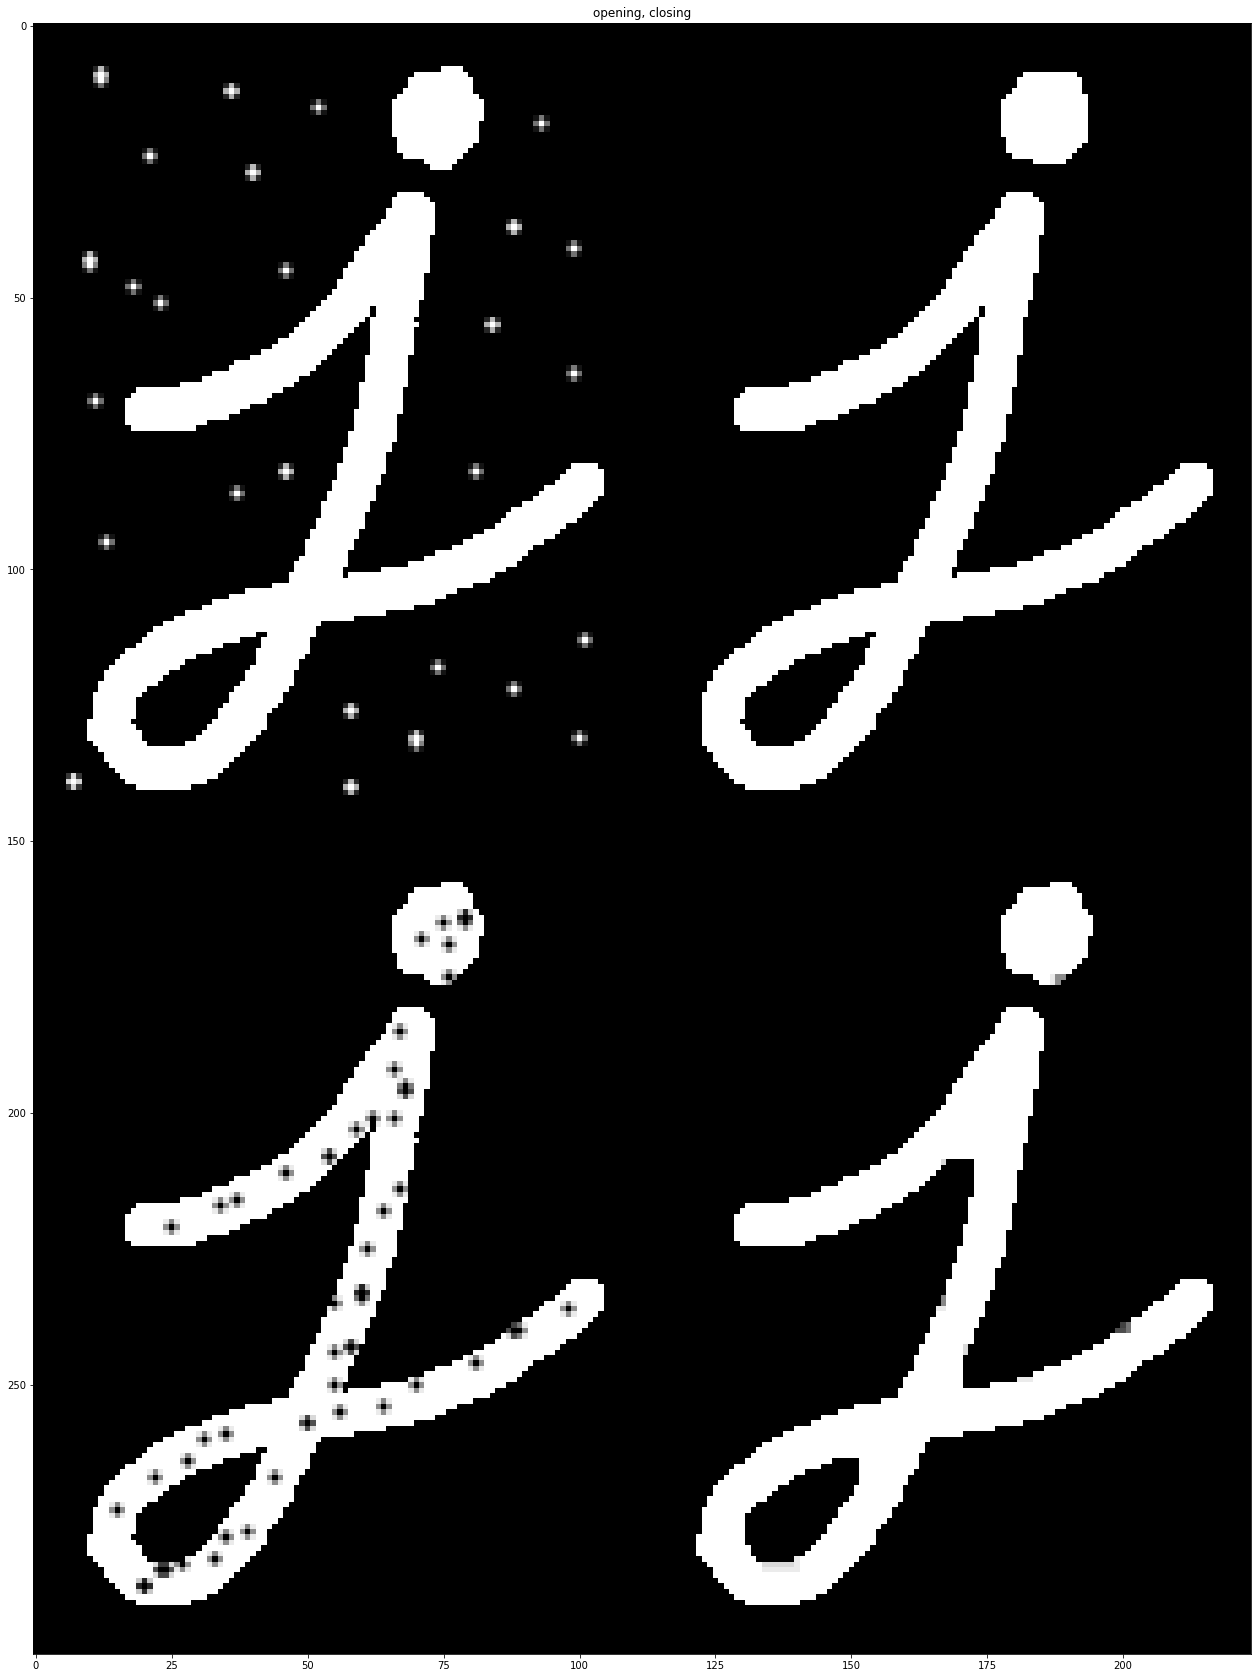

In [8]:
import cv2
import numpy as np

img1 = cv2.imread('./img/morph_dot.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./img/morph_hole.png', cv2.IMREAD_GRAYSCALE)    

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# 열림 연산 적용 ---②
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k)
# 닫힘 연산 적용 ---③
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k)

# 결과 출력
merged1 = np.hstack((img1, opening))
merged2 = np.hstack((img2, closing))
merged3 = np.vstack((merged1, merged2))
# cv2.imshow('opening, closing', merged3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('opening, closing')
plt.imshow(merged3,cmap='gray')
# plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

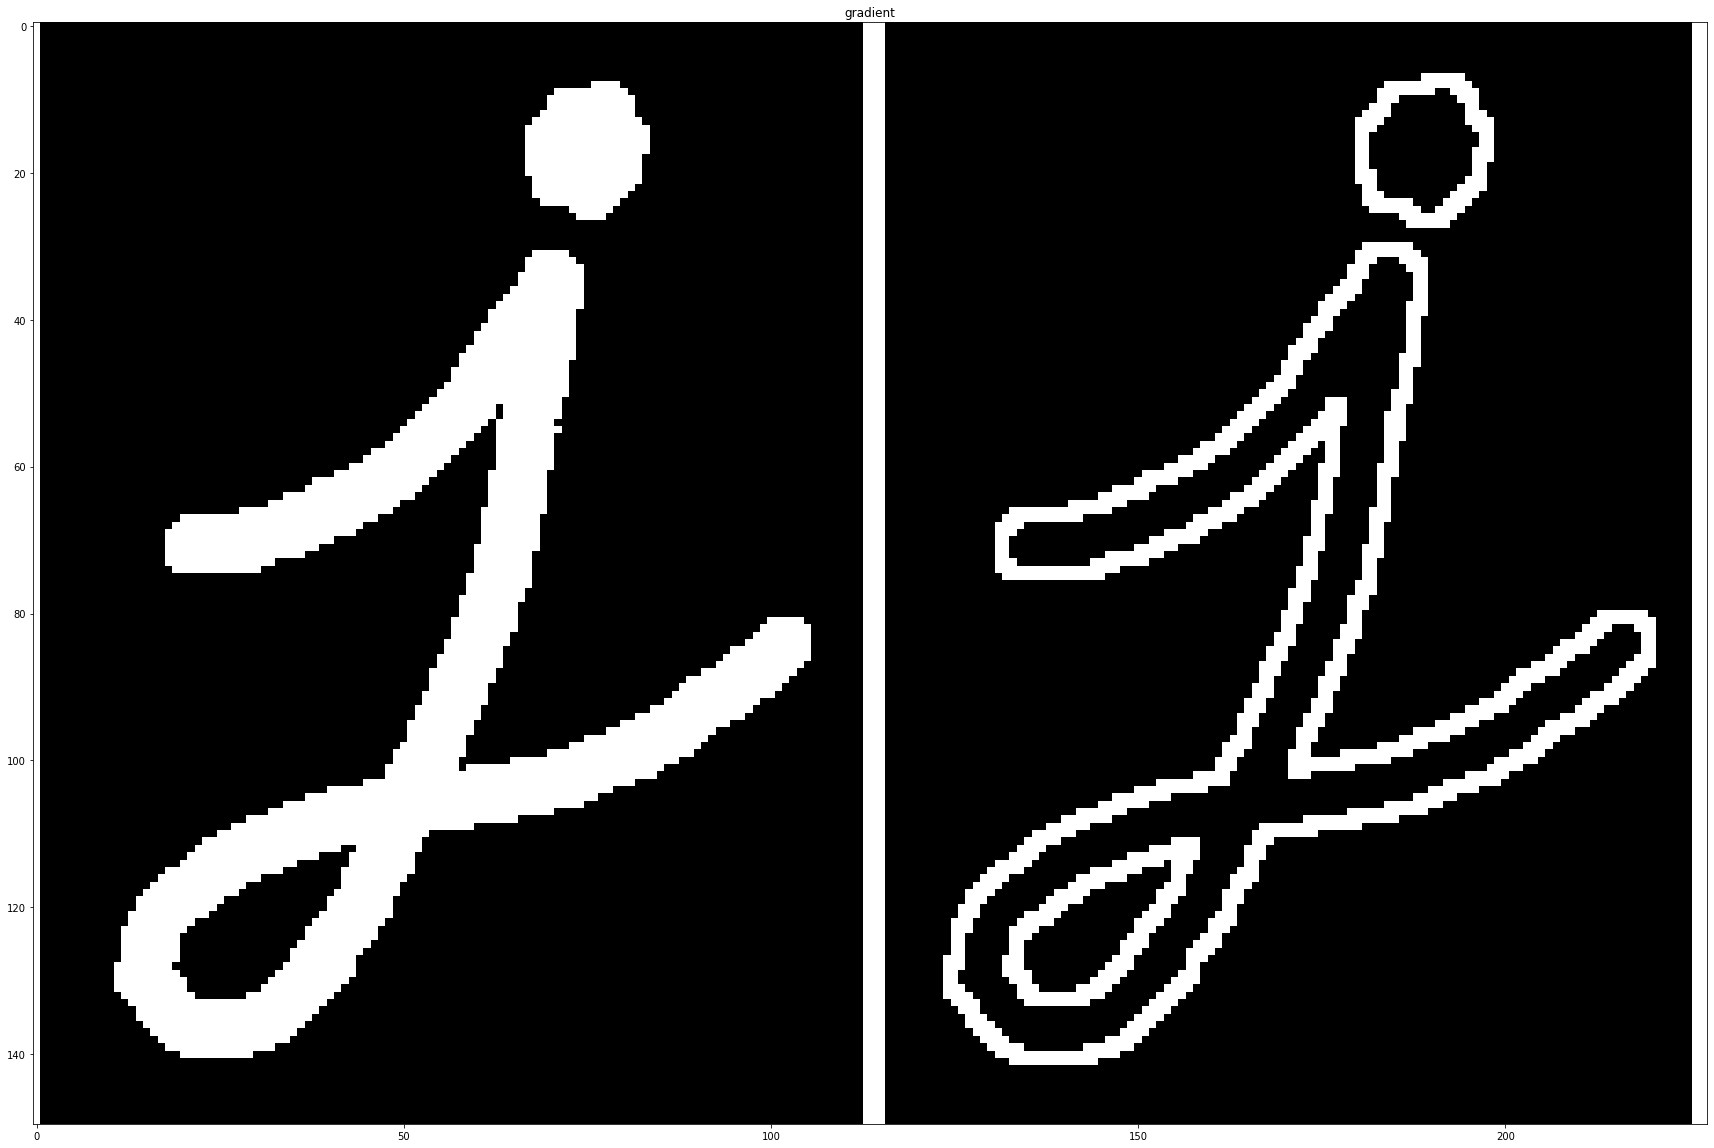

In [9]:
import cv2
import numpy as np

img = cv2.imread('./img/morphological.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 열림 연산 적용 ---②
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)

# 결과 출력
merged = np.hstack((img, gradient))
# cv2.imshow('gradient', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('gradient')
plt.imshow(merged,cmap='gray')
# plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

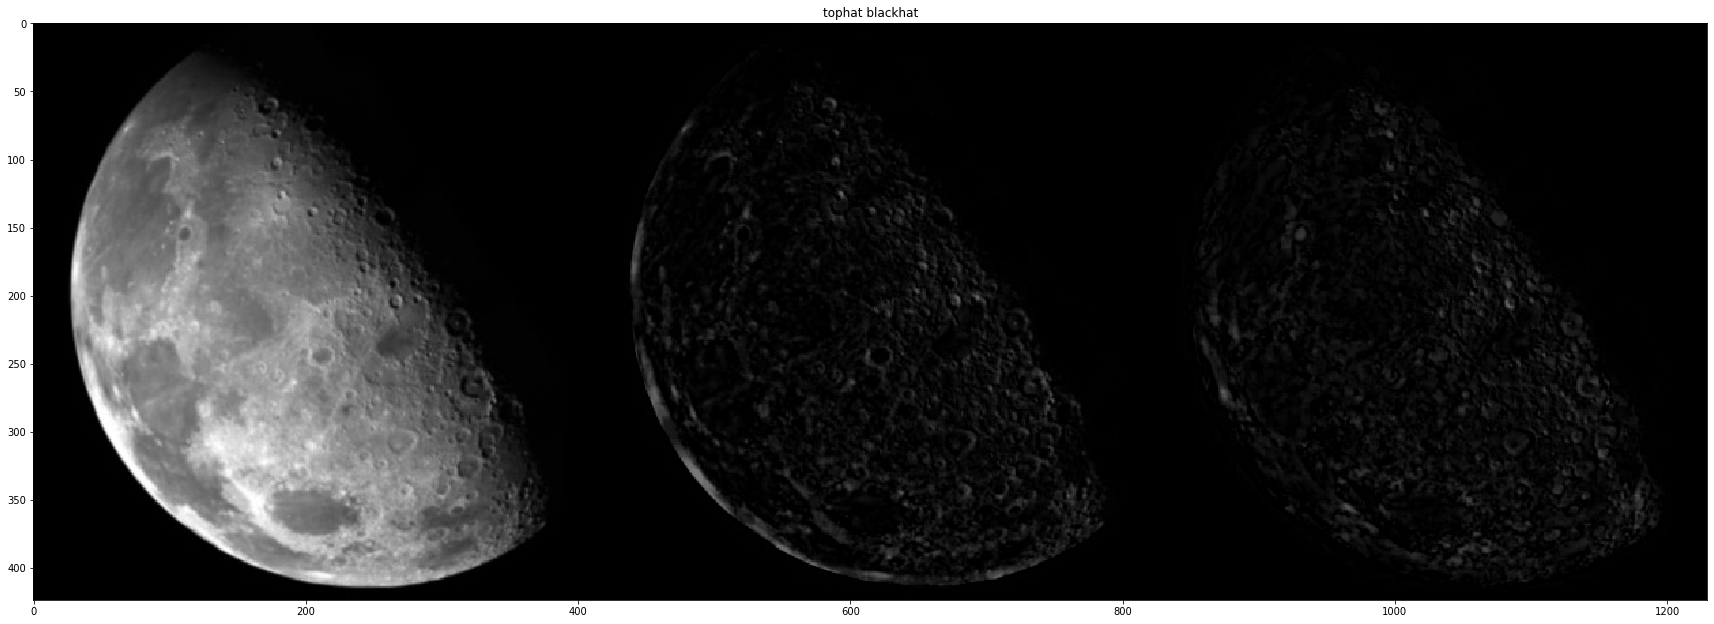

In [10]:
import cv2
import numpy as np

img = cv2.imread('./img/moon_gray.jpg')

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
# 탑햇 연산 적용 ---②
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
# 블랫햇 연산 적용 ---③
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

# 결과 출력
merged = np.hstack((img, tophat, blackhat))
# cv2.imshow('tophat blackhat', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('tophat blackhat')
plt.imshow(merged,cmap='gray')
# plt.rcParams["figure.figsize"] = (30,30)
plt.show() 

In [11]:
import cv2

img = cv2.imread('./img/girl.jpg')

# 가우시안 이미지 피라미드 축소
smaller = cv2.pyrDown(img) # img x 1/4
# 가우시안 이미지 피라미드 확대
bigger = cv2.pyrUp(img) # img x 4

# 결과 출력
cv2.imshow('img', img)
cv2.imshow('pyrDown', smaller)
cv2.imshow('pyrUp', bigger)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
import cv2
import numpy as np

img = cv2.imread('./img/taekwonv1.jpg')

# 원본 영상을 가우시안 피라미드로 축소
smaller = cv2.pyrDown(img)
# 축소한 영상을 가우시안 피라미드로 확대
bigger = cv2.pyrUp(smaller)

# 원본에서 확대한 영상 빼기
laplacian = cv2.subtract(img, bigger)
# 확대 한 영상에 라플라시안 영상 더해서 복원
restored = bigger + laplacian

# 결과 출력 (원본 영상, 라플라시안, 확대 영상, 복원 영상)
merged = np.hstack((img, laplacian, bigger, restored))
cv2.imshow('Laplacian Pyramid', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

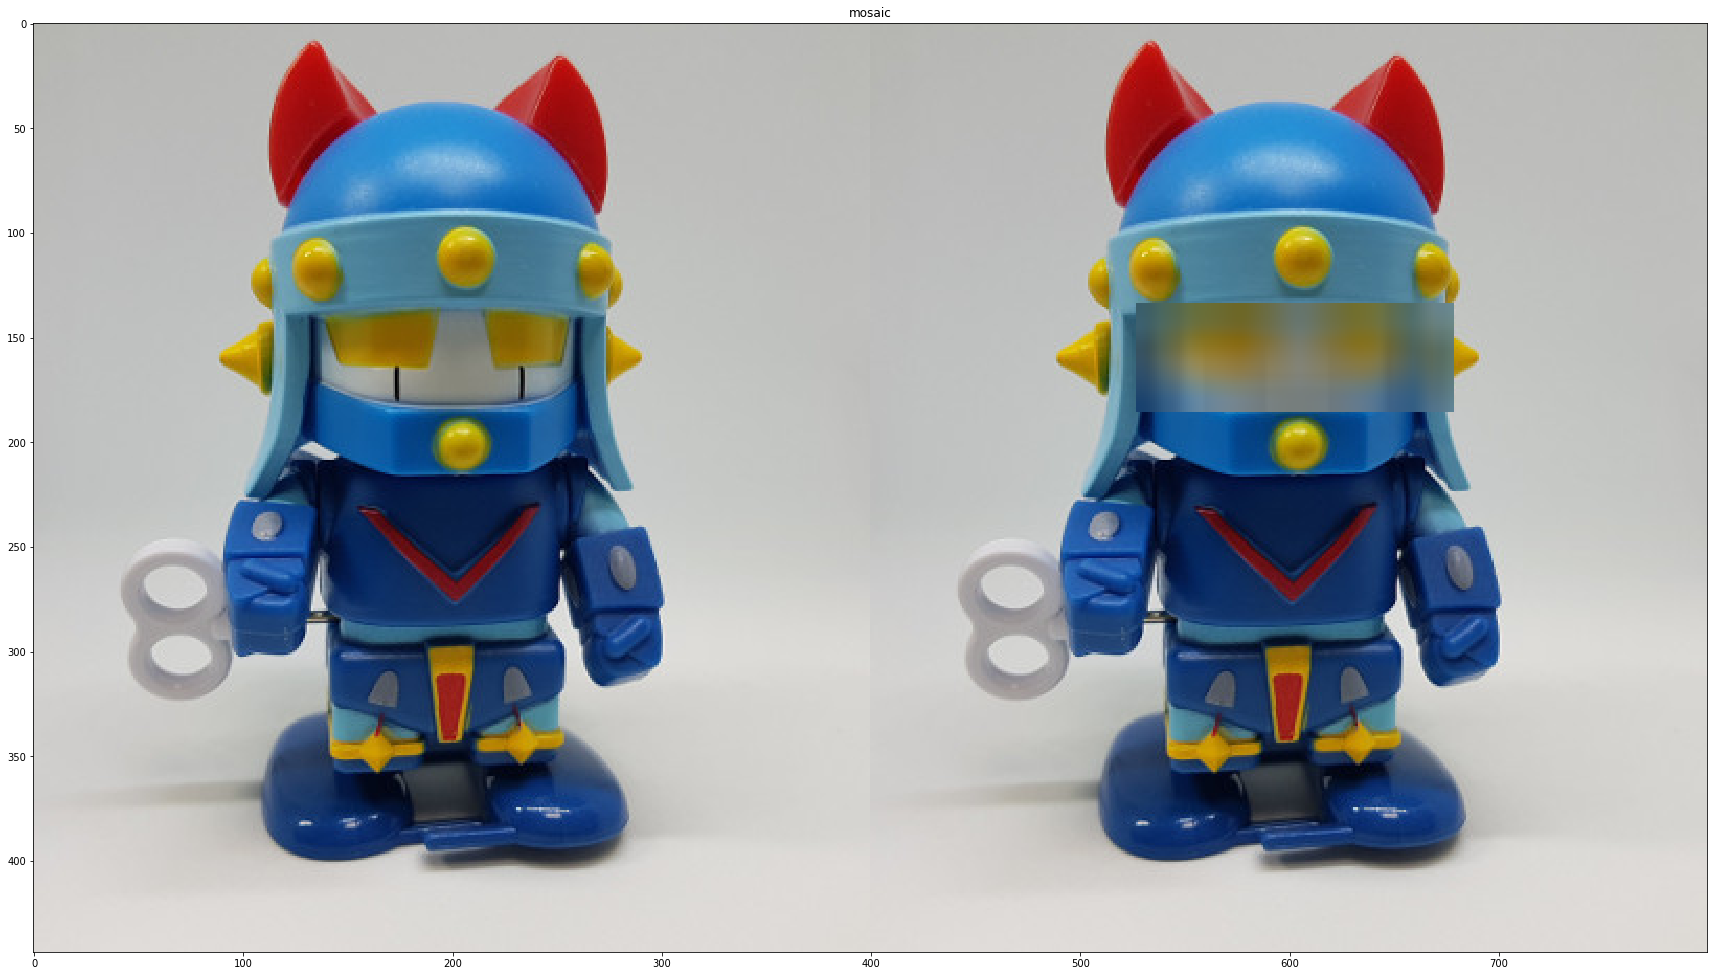

In [6]:
import cv2

import numpy as np

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2

ksize = 30              # 블러 처리에 사용할 커널 크기
win_title = 'mosaic'    # 창 제목
img = cv2.imread('./img/taekwonv1.jpg')    # 이미지 읽기
img1=img.copy()
while True:
    x,y,w,h = cv2.selectROI(win_title, img, False) # 관심영역 선택
    if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 
        roi = img[y:y+h, x:x+w]   # 관심영역 지정
        roi = cv2.blur(roi, (ksize, ksize)) # 블러(모자이크) 처리
        img[y:y+h, x:x+w] = roi   # 원본 이미지에 적용
        cv2.imshow(win_title, img)
        img2=img.copy()
    else:
        break
cv2.destroyAllWindows()
merged = np.hstack((img1,img2))
# cv2.imshow('tophat blackhat', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.title('mosaic')
plt.imshow(cv2tomat(merged))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show() 